In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as optimization

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Functions to be used throughout

In [32]:
def fetch_data(stocks, start_date, end_date):
  '''
  Args:
  stocks: Takes a list of tickers as input to fetch data from yfinance
  start_date
  end_date

  Returns:
  Closing prices of chosen stocks over the required time period
  '''
  stock_data = {}
  for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
  return pd.DataFrame(stock_data)

def calculate_log_normal_returns(data):
  '''
  Args:
  data: Dataframe of stock closing prices

  Returns:
  Log normalized dataframe
  '''
  return data.pct_change().apply(lambda x: np.log(1+x))[1:]

def plot_graph(returns, title, labels):
  '''
  Args:
  returns: Dataframe of stock returns

  Returns:
  Graph of daily returns over chosen period
  '''
  # Create a line plot using Plotly Express
  fig = px.line(returns, x=returns.index, y=returns.columns, title=title,
                labels=labels,
                line_shape='linear', render_mode='svg', template='plotly_dark')

  # Show the plot
  fig.show()

def generate_portfolios(returns, num_portfolios, num_business_days):
  '''
  Args:
  returns: log normalized returns of chosen stocks that would be used to calculate mean and covariance
  num_portfolios: number of random portfolios to be generated
  num_business_days: number of working business days. Example - 3 months = 62 days

  Returns:
  portfolio_weights: array of length n = no of chosen portfolios with random weights
  portfolio_means: corresponding portfolio means of generated portfolios
  portfolio_volatility: corresponding portfolio volatility of generated portfolios
  '''
  portfolio_means=[]   # list to store means(returns)
  portfolio_volatility=[]   # list to store volatility
  portfolio_weights=[]
  sharpe_ratio_arr = []

  for _ in range(num_portfolios):
    n_assets = np.array(returns).shape[1]
    w = np.random.dirichlet(np.ones(n_assets), size=1)[0] #creating random 1D array for weights with len = no. of stocks
    w /= np.sum(w)
    portfolio_weights.append(w)

    # mu = np.sum(returns.mean() *num_business_days * w)
    mu = ((returns.mean()*num_business_days)@w)
    portfolio_means.append(mu)

    # volatility = np.sqrt(np.dot(w.T, np.dot(returns.cov() *num_business_days, w)))
    volatility = np.sqrt(w.T @ (returns.cov() *num_business_days @ w))
    portfolio_volatility.append(volatility)

    sharpe_ratio = mu/volatility
    sharpe_ratio_arr.append(sharpe_ratio)

  return np.array(portfolio_weights) , np.array(portfolio_means) , np.array(portfolio_volatility)

10 stocks from various domains:

- Technology: AAPL (Apple Inc.)
- Healthcare: PFE (Pfizer Inc.)
- Consumer Goods: PG (Procter & Gamble Co.)
- Financial Services: JPM (JPMorgan Chase & Co.)
- Energy: XOM (Exxon Mobil Corporation)
- Retail: AMZN (Amazon.com Inc.)
- Telecommunications: T (AT&T Inc.)
- Entertainment: DIS (The Walt Disney Company)
- Automotive: TSLA (Tesla, Inc.)
- Aerospace and Defense: BA (The Boeing Company)

In [30]:
#Define variables
start_date = '2023-11-15'
end_date = '2024-02-15'
num_portfolios = 10000
num_business_days = 62
np.randomseed = 42

# List of tickers
stocks = ["AAPL", "PFE", "PG", "JPM", "XOM", "AMZN", "T", "DIS", "TSLA", "BA"]

#Fetch data
data = fetch_data(stocks, start_date, end_date)

#Calculated log normalized returns
returns = calculate_log_normal_returns(data)

In [ ]:
plot_graph(data, title='Simple returns', labels={'value': 'Returns', 'index': 'Time'})

In [20]:
#Log normalized returns
returns

,AAPL,PFE,PG,JPM,XOM,AMZN,T,DIS,TSLA,BA
Date,,,,,,,,,,
2023-11-16 00:00:00-05:00,0.009002,-0.014010,0.009269,0.011355,-0.011644,-0.002587,0.007585,0.006156,-0.038835,-0.010161
2023-11-17 00:00:00-05:00,-0.000106,0.005026,-0.011583,0.009005,0.024107,0.016319,0.001259,-0.003816,0.003035,0.006946
2023-11-20 00:00:00-05:00,0.009235,0.002003,-0.005310,0.003071,-0.004392,0.006522,0.012500,0.009303,0.005533,0.045434
2023-11-21 00:00:00-05:00,-0.004240,0.010617,-0.004402,-0.002090,-0.000383,-0.015378,0.005574,-0.006122,0.023491,0.002569
2023-11-22 00:00:00-05:00,0.003508,0.000660,0.009380,0.002351,-0.004317,0.019339,-0.001236,0.006543,-0.029408,0.007486
...,...,...,...,...,...,...,...,...,...,...
2024-02-08 00:00:00-05:00,-0.005771,0.000363,-0.003021,-0.003598,0.016975,-0.004054,-0.029870,0.108844,0.010500,-0.012823
2024-02-09 00:00:00-05:00,0.004086,-0.000363,-0.007720,0.001201,-0.021387,0.026781,0.001188,-0.019642,0.020934,-0.000096
2024-02-12 00:00:00-05:00,-0.009043,0.003622,-0.001971,0.004447,0.013663,-0.012169,0.010632,0.008269,-0.028506,0.000621


In [ ]:
plot_graph(returns, title='Normalized daily returns', labels={'value': 'Returns', 'index': 'Time'})

In [21]:
#Calculate expected returns and variance of stocks
'''
mu: defines the expected return of each stock by taking the average of closing prices over the given period
sigma: covariance matrix wherein diagonal elements represent the risk or variance of the stock
'''
mu = returns.mean()*num_business_days
covariance_matrix = returns.cov()*num_business_days
print("Expected returns of stocks\n",mu,"\n")
print("Covariance Matrix\n",covariance_matrix)

Expected returns of stocks
 AAPL   -0.019788
PFE    -0.094191
PG      0.034272
JPM     0.170654
XOM    -0.018631
AMZN    0.180211
T       0.088031
DIS     0.178140
TSLA   -0.256326
BA     -0.026294
dtype: float64 

Covariance Matrix
           AAPL       PFE        PG       JPM       XOM      AMZN         T  \
AAPL  0.007444 -0.001496 -0.000473  0.000203 -0.001412  0.004450  0.000840   
PFE  -0.001496  0.018774  0.000419  0.001144  0.001607  0.000159  0.002243   
PG   -0.000473  0.000419  0.007311 -0.000063  0.001667  0.000213  0.001304   
JPM   0.000203  0.001144 -0.000063  0.003197  0.002444  0.000911  0.001588   
XOM  -0.001412  0.001607  0.001667  0.002444  0.008883 -0.000857  0.001696   
AMZN  0.004450  0.000159  0.000213  0.000911 -0.000857  0.015820 -0.000693   
T     0.000840  0.002243  0.001304  0.001588  0.001696 -0.000693  0.011559   
DIS   0.001200  0.001478 -0.000057  0.000304  0.004490 -0.000282 -0.002143   
TSLA  0.001876  0.004800 -0.004217  0.001449 -0.000373  0.003534

<Axes: >

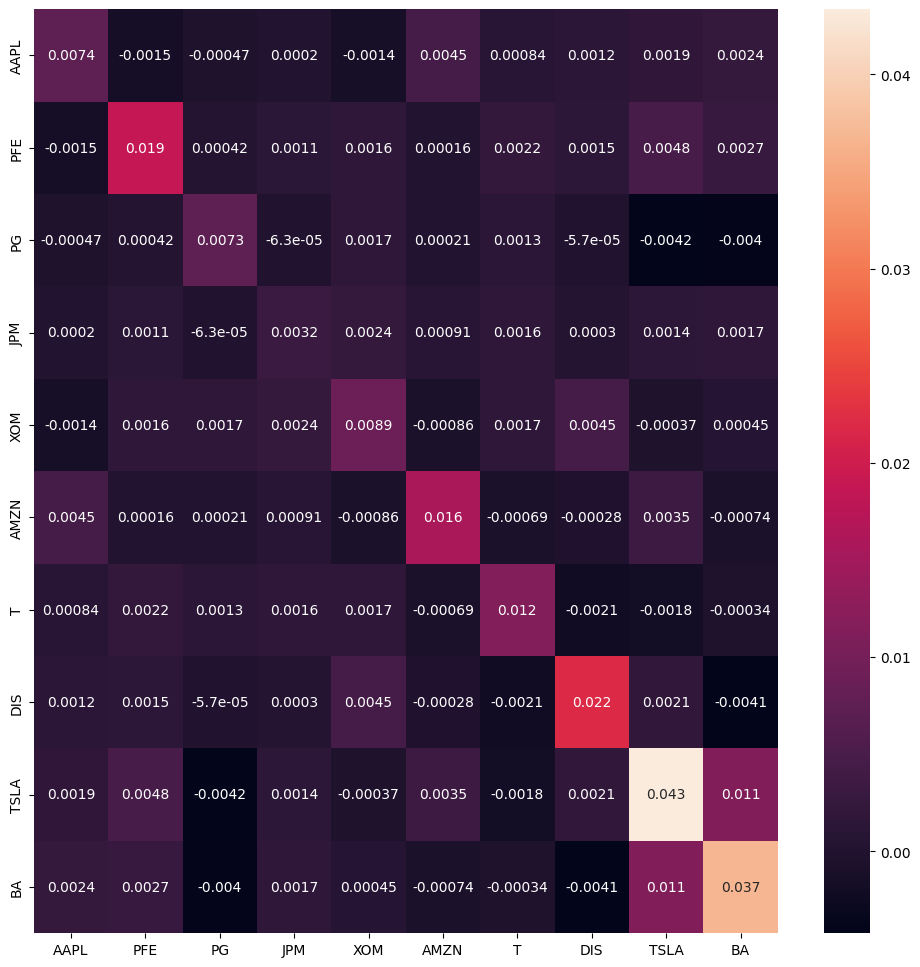

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(covariance_matrix, annot=True)

In [ ]:
fig = px.line(x = stocks, y=mu)

# Customizing the plot
fig.update_layout(
    xaxis_title="Stock",
    yaxis_title="Average Expected Return",
    template='plotly_dark',
    font_color="white",
    height = 600,
    width = 800
)

# Show the plot
fig.show()

## Generating portfolios and calculating efficient frontier

In [33]:
portfolio_weights, portfolio_means, portfolio_volatilities = generate_portfolios(returns, num_portfolios, num_business_days)

In [34]:
import cvxpy as cp
mu = np.array(mu)

n_assets = 10
w = cp.Variable(n_assets)
target_sigma = cp.Parameter(nonneg=True)

mu1 = mu @ w  # expected return
objective = cp.Maximize(mu1)
constraints = [cp.sum(w) == 1, cp.quad_form(w, covariance_matrix) <= target_sigma**2]

frontier_weights = []
frontier_returns = []

for sigma in portfolio_volatilities:
    target_sigma.value = sigma
    problem = cp.Problem(objective, constraints)
    try:
        problem.solve(solver=cp.ECOS)
        if problem.status == 'optimal':
            frontier_weights.append(w.value)
            frontier_returns.append(mu1.value)
    except:
        continue

/usr/local/lib/python3.10/dist-packages/cvxpy/reductions/solvers/solving_chain.py:213: UserWarning:

You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming



### Calculate optimal portfolio

In [24]:
#optimal portfolio
def find_optimal_portfolio(stocks, returns):
  n = len(stocks)
  U = np.ones(n)

  numerator = U@np.linalg.inv(returns.cov() * num_business_days)
  denominator = U@np.linalg.inv(returns.cov() * num_business_days)@(U.T)
  W = numerator/denominator

  opt_mean = (np.sum(returns.mean() * num_business_days * W) )
  opt_risk = (np.sqrt(np.dot(W.T, np.dot(returns.cov() * num_business_days, W))))
  return W, opt_risk, opt_mean

In [25]:
w, opt_risk, opt_mean = find_optimal_portfolio(stocks, returns)

In [26]:
w, opt_risk, opt_mean

(array([ 0.16534659,  0.04255531,  0.2355657 ,  0.37686836, -0.00280049,
         0.02079187,  0.0450225 ,  0.06050238,  0.01995811,  0.03618967]),
 0.03824984727190062,
 0.07758017894910403)

## Plot optimal point and efficient frontier

In [36]:
# Generate random indices
index1 = np.random.randint(0, len(frontier_returns))
index2 = np.random.randint(0, len(frontier_returns))

# Retrieve corresponding values
point1 = (portfolio_volatilities[index1], frontier_returns[index1])
point2 = (portfolio_volatilities[index2], frontier_returns[index2])

print("Randomly selected points:")
print("Point 1:", point1)
print("Point 2:", point2)

print("\n")
print("Corresponding weights:")
print("Point 1:", frontier_weights[index1])
print("Point 2:", frontier_weights[index2])


Randomly selected points:
Point 1: (0.06960516138541444, 0.3449509446378513)
Point 2: (0.06309528229720737, 0.3082883226572738)


Corresponding weights:
Point 1: [-0.27610503 -0.11198081  0.19006307  1.1314967  -0.49370743  0.19633005
  0.12323161  0.27286653 -0.10628662  0.07409194]
Point 2: [-0.21557194 -0.0907904   0.1963025   1.02801989 -0.42639286  0.1722598
  0.11250738  0.24374657 -0.08897561  0.06889468]


In [35]:
import plotly.graph_objects as go

# Create scatter plot
fig = go.Figure()

# Scatter plot for portfolio points
fig.add_trace(go.Scatter(
    x=portfolio_volatilities,
    y=portfolio_means,
    mode='markers',
    marker=dict(
        size=5,
        color=portfolio_volatilities/portfolio_means,
        colorscale='Viridis',
        opacity=0.7,
        colorbar=dict(title='Risk / Mean Ratio')
    ),
    name='Portfolio Points'
))

fig.add_trace(go.Scatter(
    x=portfolio_volatilities,
    y=frontier_returns,
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.7,
    ),
    name='Efficient Frontier'
))

# Scatter plot for optimal point
fig.add_trace(go.Scatter(
    x=[opt_risk],
    y=[opt_mean],
    mode='markers',
    marker=dict(
        color='blue',
        size=10,
        symbol='star'
    ),
    name='Optimal Point'
))

# Add labels and title
fig.update_layout(
    title='Portfolio Means vs. Volatility',
    xaxis=dict(title='Portfolio Volatility'),
    yaxis=dict(title='Portfolio Means'),
    hovermode='closest',
    height=800
)

fig.show()

In [44]:
import numpy as np
import plotly.graph_objects as go

# Generate random indices
index1 = np.random.randint(0, len(frontier_returns))
index2 = np.random.randint(0, len(frontier_returns))

# Retrieve corresponding values
point1 = (portfolio_volatilities[index1], frontier_returns[index1])
point2 = (portfolio_volatilities[index2], frontier_returns[index2])

# Create scatter plot
fig = go.Figure()

# Scatter plot for portfolio points
fig.add_trace(go.Scatter(
    x=portfolio_volatilities,
    y=portfolio_means,
    mode='markers',
    marker=dict(
        size=5,
        color=portfolio_volatilities / portfolio_means,
        colorscale='Viridis',
        opacity=0.7,
        colorbar=dict(title='Volatility / Mean Ratio')
    ),
    name='Portfolio Points'
))

# Scatter plot for efficient frontier
fig.add_trace(go.Scatter(
    x=portfolio_volatilities,
    y=frontier_returns,
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.7,
    ),
    name='Efficient Frontier'
))

# Scatter plot for optimal point
fig.add_trace(go.Scatter(
    x=[opt_risk],
    y=[opt_mean],
    mode='markers',
    marker=dict(
        color='blue',
        size=20,
        symbol='star'
    ),
    name='Optimal Point'
))

# Scatter plot for random points
fig.add_trace(go.Scatter(
    x=[point1[0], point2[0]],
    y=[point1[1], point2[1]],
    mode='markers',
    marker=dict(
        color='#293646',
        size=15,
        symbol='star'
    ),
    name='Random Points'
))

# Add labels and title
fig.update_layout(
    title='Portfolio Means vs. Volatility',
    xaxis=dict(title='Portfolio Volatility'),
    yaxis=dict(title='Portfolio Means'),
    hovermode='closest',
    height=800
)

fig.show()
